# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [ ]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 1: Generowanie procesów punktowych

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1) Generujemy punkty na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Do współrzędnych każdego z punktów dodajemy komponent losowy określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

Parametry przykładowego rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10


#### a) Przygotowanie funkcji

In [4]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    dx = (x_lim[1] - x_lim[0]) / grid[1]
    dy = (y_lim[1] - y_lim[0]) / grid[0]
    wkx = np.linspace(x_lim[0] + 0.5 * dx, x_lim[1] - 0.5 * dx, grid[1])
    wky = np.linspace(y_lim[0] + 0.5 * dy, y_lim[1] - 0.5 * dy, grid[0])
    randx = np.random.uniform(- 0.5 * dx, 0.5 * dx, grid[0] * grid[1])
    randy = np.random.uniform(- 0.5 * dy, 0.5 * dy, grid[0] * grid[1])
    xx, yy = np.meshgrid(wkx, wky, indexing= 'ij')
    xx_flatten = xx.flatten()
    yy_flatten = yy.flatten()
    X = xx_flatten + random_component * randx
    Y = yy_flatten + random_component * randy
    return pd.DataFrame({'X': X, 'Y': Y})
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [5]:
# YOUR CODE HERE
rozklad_r = regular_on_rectangle([10, 20], 0.5, [0, 20], [0, 10])
#raise NotImplementedError()

#### c) Wizualizacja

(0.0, 10.0)

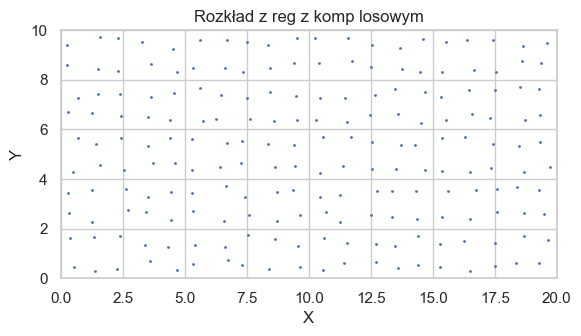

In [6]:
# YOUR CODE HERE
plt.scatter(x = rozklad_r['X'], y = rozklad_r['Y'], s = 1 )
plt.title('Rozkład z reg z komp losowym')
plt.ylabel('Y')
plt.xlabel('X')
plt.axis('square')
plt.xlim([0,20])
plt.ylim([0,10])
#raise NotImplementedError()

### Zadanie 2: Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `homogeneous_poisson_on_rectangle()`, która będzie generować jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Losujemy liczbę punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Niezależnie od siebie losujemy wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

Parametry przykładowego rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [12]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    pole = (x_lim[1] - x_lim[0]) * (y_lim[1] - y_lim[0])
    lambada = intensity * pole
    n = np.random.poisson(lambada, 1)
    probkix = np.random.uniform(x_lim[0], x_lim[1], n)
    probkiy = np.random.uniform(y_lim[0], y_lim[1], n)
    return pd.DataFrame({'X': probkix, 'Y': probkiy})
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [13]:
# YOUR CODE HERE
rozklad_hp = homogeneous_poisson_on_rectangle(10, [0, 20], [0, 10])
#raise NotImplementedError()

#### c) Wizualizacja

(0.0, 10.0)

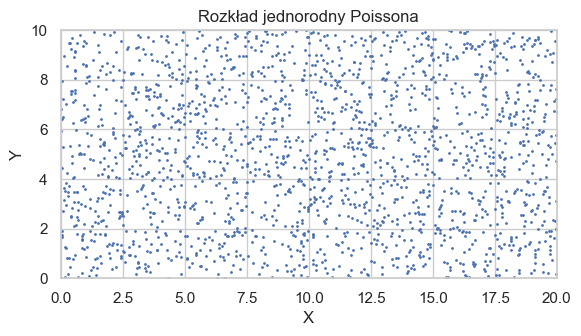

In [14]:
# YOUR CODE HERE
plt.scatter(x = rozklad_hp['X'], y = rozklad_hp['Y'], s = 1 )
plt.title('Rozkład jednorodny Poissona')
plt.ylabel('Y')
plt.xlabel('X')
plt.axis('square')
plt.xlim([0,20])
plt.ylim([0,10])
#raise NotImplementedError()

### Zadanie 3: Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `unhomogeneous_poisson_on_rectangle()`, która będzie generować niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Generujemy punkty z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze.
2. Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.

Parametry przykładowego rozkładu:
 - intensywność procesu: f(x, y) = x
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [15]:
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    def g(x):
        return -intensity_function(x[0], x[1])
    intensity = - sp.optimize.minimize(g, [(x_lim[0] + x_lim[1]) / 2,(y_lim[0] + y_lim[1]) / 2], bounds = [x_lim, y_lim]).fun
    punkty = homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim)
    zakres = len(punkty.index)
    tab = np.array([0,0])
    for i in range(zakres):
        tab[0] = punkty['X'][i]
        tab[1] = punkty['Y'][i]
        prawdopodobienstwo = 1 - (intensity_function(tab[0], tab[1]) / intensity)
        czy_usu = np.random.uniform(0,1)
        if czy_usu < prawdopodobienstwo:
            punkty = punkty.drop(i)
    return punkty
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [16]:
# YOUR CODE HERE
def f(x, y):
    return x
rozklad_up = unhomogeneous_poisson_on_rectangle(f, [0, 20], [0, 10])
#raise NotImplementedError()

#### c) Wizualizacja

(0.0, 10.0)

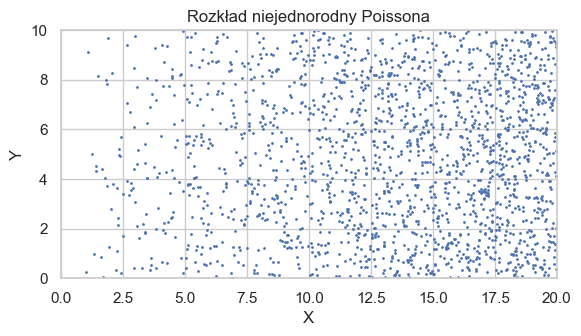

In [17]:
# YOUR CODE HERE
plt.scatter(x = rozklad_up['X'], y = rozklad_up['Y'], s = 1 )
plt.title('Rozkład niejednorodny Poissona')
plt.ylabel('Y')
plt.xlabel('X')
plt.axis('square')
plt.xlim([0,20])
plt.ylim([0,10])
#raise NotImplementedError()

### Zadanie 4: Proces punktowy Matérna w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `materna_on_rectangle()`, która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów (okrąg o promieniu równym wartości parametru `cluster_radius`) generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [29]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    nowex = [x_lim[0] - cluster_radius, x_lim[1] + cluster_radius]
    nowey = [y_lim[0] - cluster_radius, y_lim[1] + cluster_radius]
    parent_points = homogeneous_poisson_on_rectangle(parent_intensity, nowex, nowey)
    zakres = len(parent_points.index)
    tabx = np.array([])
    taby = np.array([])
    for i in range(zakres):
        daughter_points = homogeneous_poisson_on_rectangle(daughter_intensity, [parent_points['X'][i] - cluster_radius, parent_points['X'][i] + cluster_radius], [parent_points['Y'][i] - cluster_radius, parent_points['Y'][i] + cluster_radius])  
        zakres2 = len(daughter_points.index)
        for j in range(zakres2):
            if (daughter_points['X'][j] - parent_points['X'][i])**2 + (daughter_points['Y'][j] - parent_points['Y'][i])**2 > cluster_radius**2:
                daughter_points = daughter_points.drop(j)
        daughter_pointsX = daughter_points['X'].to_numpy()
        daughter_pointsY = daughter_points['Y'].to_numpy()
        tabx = np.append(tabx, daughter_pointsX)
        taby = np.append(taby, daughter_pointsY)
    XY = pd.DataFrame({'X': tabx, 'Y': taby})
    zakres3 = len(XY.index)
    for i in range(zakres3):
        if (XY['X'][i] < x_lim[0]) or (XY['X'][i] > x_lim[1]) or (XY['Y'][i] < y_lim[0]) or (XY['Y'][i] > y_lim[1]):
            XY = XY.drop(i)
    return (XY.reindex())                                                       
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [30]:
# YOUR CODE HERE
rozklad_m = materna_on_rectangle(0.2, 10, 1, [0, 20], [0, 10])
#raise NotImplementedError()

#### c) Wizualizacja

(0.0, 10.0)

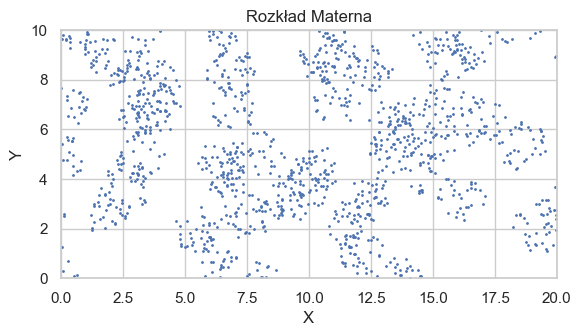

In [42]:
# YOUR CODE HERE
plt.scatter(x = rozklad_m['X'], y = rozklad_m['Y'], s = 1)
plt.title('Rozkład Materna')
plt.ylabel('Y')
plt.xlabel('X')
plt.axis('square')
plt.xlim([0,20])
plt.ylim([0,10])
#raise NotImplementedError()

### Zadanie 5: Proces punktowy Thomasa w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `thomas_on_rectangle()`, która będzie generować proces punktowy Thomasa w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (na potrzeby zadania przyjmijmy 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Losujemy liczbę punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Niezależnie od siebie losujemy wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [37]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    nowex = [x_lim[0] - 4*cluster_sigma, x_lim[1] + 4*cluster_sigma]
    nowey = [y_lim[0] - 4*cluster_sigma, y_lim[1] + 4*cluster_sigma]
    parent_points = homogeneous_poisson_on_rectangle(parent_intensity, nowex, nowey)
    zakres = len(parent_points.index)
    tabx = np.array([])
    taby = np.array([])
    for i in range(zakres):
        n = np.random.poisson(mean_cluster_size, 1)
        wspx = np.random.normal(parent_points['X'][i], cluster_sigma, n)
        wspy = np.random.normal(parent_points['Y'][i], cluster_sigma, n)
        tabx = np.append(tabx, wspx)
        taby = np.append(taby, wspy)
    XY = pd.DataFrame({'X': tabx, 'Y': taby})
    zakres2 = len(XY.index)
    for i in range(zakres2):
        if (XY['X'][i] < x_lim[0]) or (XY['X'][i] > x_lim[1]) or (XY['Y'][i] < y_lim[0]) or (XY['Y'][i] > y_lim[1]):
            XY = XY.drop(i)
    return (XY.reindex())
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [38]:
# YOUR CODE HERE
rozklad_t = thomas_on_rectangle(0.2, 30, 0.5, [0, 20], [0, 10])
#raise NotImplementedError()

#### c) Wizualizacja

(0.0, 10.0)

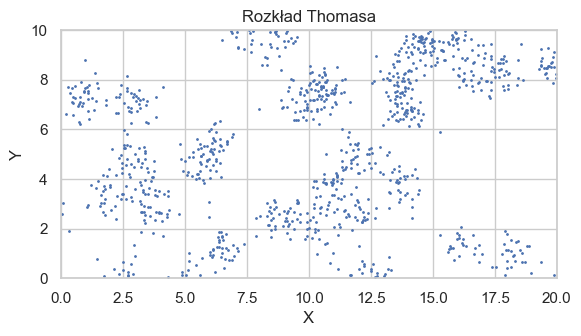

In [39]:
# YOUR CODE HERE
plt.scatter(x = rozklad_t['X'], y = rozklad_t['Y'], s = 1 )
plt.title('Rozkład Thomasa')
plt.ylabel('Y')
plt.xlabel('X')
plt.axis('square')
plt.xlim([0,20])
plt.ylim([0,10])
#raise NotImplementedError()